In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [319]:
def predict(X, w):
    return X.dot(w)

def gen_data(m,n, noise=0.1):
    rw = np.random.random(size=n+1)
    X = (np.random.random(size=(m,n))-0.5)
    X = np.hstack((np.ones((m,1)),X))
    Y = predict(X,rw)+np.random.normal(size=(m))*noise
    return X,Y,rw

(200, 2) (200,)


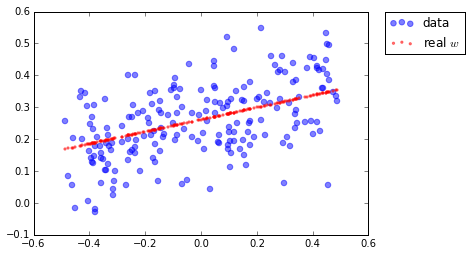

In [332]:
X,Y,rw = gen_data(200,1)
print X.shape, Y.shape
plt.scatter(X[:,1],Y, color="blue", s=30, alpha=0.5, label="data")
plt.scatter(X[:,1],predict(X,rw), s=5, color="red", alpha=0.5, label="real $w$")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

###**PROBLEMA 1**
Completa la siguiente función de forma que 

$$compute\_grad(X,Y,w)=\nabla J(w)$$

con

$$J(w) = \frac{1}{2}\sum_{i=1}^m (w^T x^{(i)} - y^{(i)})^2$$

$$\frac{\partial J(w)}{\partial w_j}  = \sum_{i=1}^m (w^T x^{(i)} - y^{(i)})x_j^{(i)}$$

y

$$\nabla J(w) = X^T(X\theta - Y)$$

In [333]:
def compute_grad(X,Y,w):
    # TU CODIGO AQUI
    gradiente = 0
    return gradiente    

###**PROBLEMA 2**

Completa la función `grad_descent` para que implemente el siguiente pseudocódigo

**input**

    X,Y, alpha, max_iters, min_delta
    
**function**

    m  = número de filas de X

    gw = vector aleatorio con m elementos

    while not exceed max_iters {
    
        grad  = compute_grad(X,Y,gw)
        delta = alpha * grad / m
        gw    = gw - delta
        sum_delta = sum(delta**2)
        if sum_delta < min_delta:
            break
     }
     
**returns**

    number_of_iterations, sum_delta, gw

In [334]:
def grad_descent(X,Y,alpha=0.1, max_iters=1000, min_delta=1e-6):
    gw = np.ones(X.shape[1])
    for i in range(max_iters):
        # TU CODIGO AQUI
        
    return i, np.sum(delta**2),gw

ejemplo de salida esperada con el código siguiente:

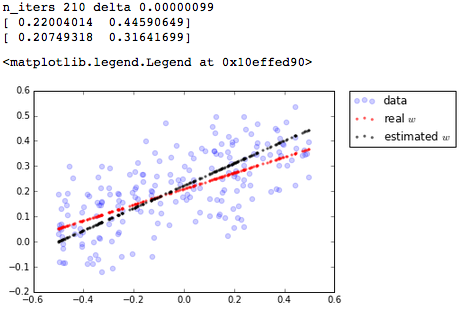

In [335]:
from IPython.display import Image
Image(filename='imgs/regr.png') 

n_iters 234 delta 0.00000099
[ 0.26076497  0.34621805]
[ 0.26101781  0.18962733]


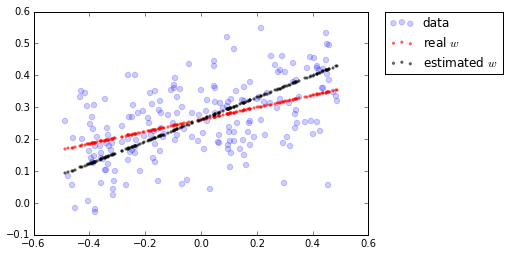

In [336]:
n_iters, sum_delta, w = grad_descent(X,Y)
print "n_iters", n_iters, "delta %.8f"%sum_delta
print w
print rw
plt.scatter(X[:,1],Y, color="blue", s=30, alpha=0.2, label="data")
plt.scatter(X[:,1],X.dot(rw), color="red", s=5, alpha=0.5, label="real $w$")
plt.scatter(X[:,1],X.dot(w), color="black", s=5, alpha=0.5, label="estimated $w$" )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### PROBLEMA 3

Organiza las funciones desarrolladas en una clase según el esquema siguiente:

In [354]:
from time import time
class GDRegression:
    def __init__ (self, alpha=0.1, max_iters=1000, min_delta=1e-6):
        self.alpha = alpha
        self.max_iters  = max_iters
        self.min_delta  = min_delta
        self.fit_times  = []

    def fit(self,X,Y):
        t = time()
        self.w = np.ones(X.shape[1])
        for i in range(self.max_iters):
            # TU CODIGO AQUI
        self.fit_times.append(time()-t) 
        print i
        
    def predict(self,X):
        return X.dot(self.w)

    def score(self,X,Y):
        return np.mean(np.sqrt((self.predict(X)-Y)**2))

    def get_times(self):
        return {"fit_time_meanstd": [np.mean(self.fit_times), np.std(self.fit_times)], "n_runs": len(self.fit_times)}

99999
error 0.0808599537297
estimated weigths [ 0.25935905  0.21862213]
real weights      [ 0.26101781  0.18962733]


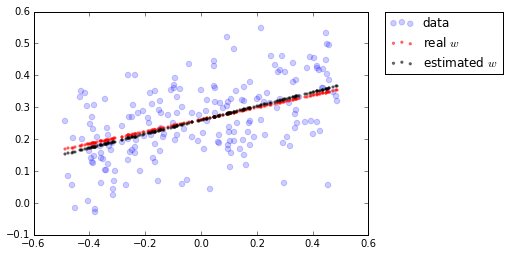

In [356]:
g = GDRegression()
g.fit(X,Y)
print "error", g.score(X,Y)
print "estimated weigths", g.w
print "real weights     ", rw
plt.scatter(X[:,1],Y, color="blue", s=30, alpha=0.2, label="data")
plt.scatter(X[:,1],X.dot(rw), color="red", s=5, alpha=0.5, label="real $w$")
plt.scatter(X[:,1],g.predict(X), color="black", s=5, alpha=0.5, label="estimated $w$" )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)